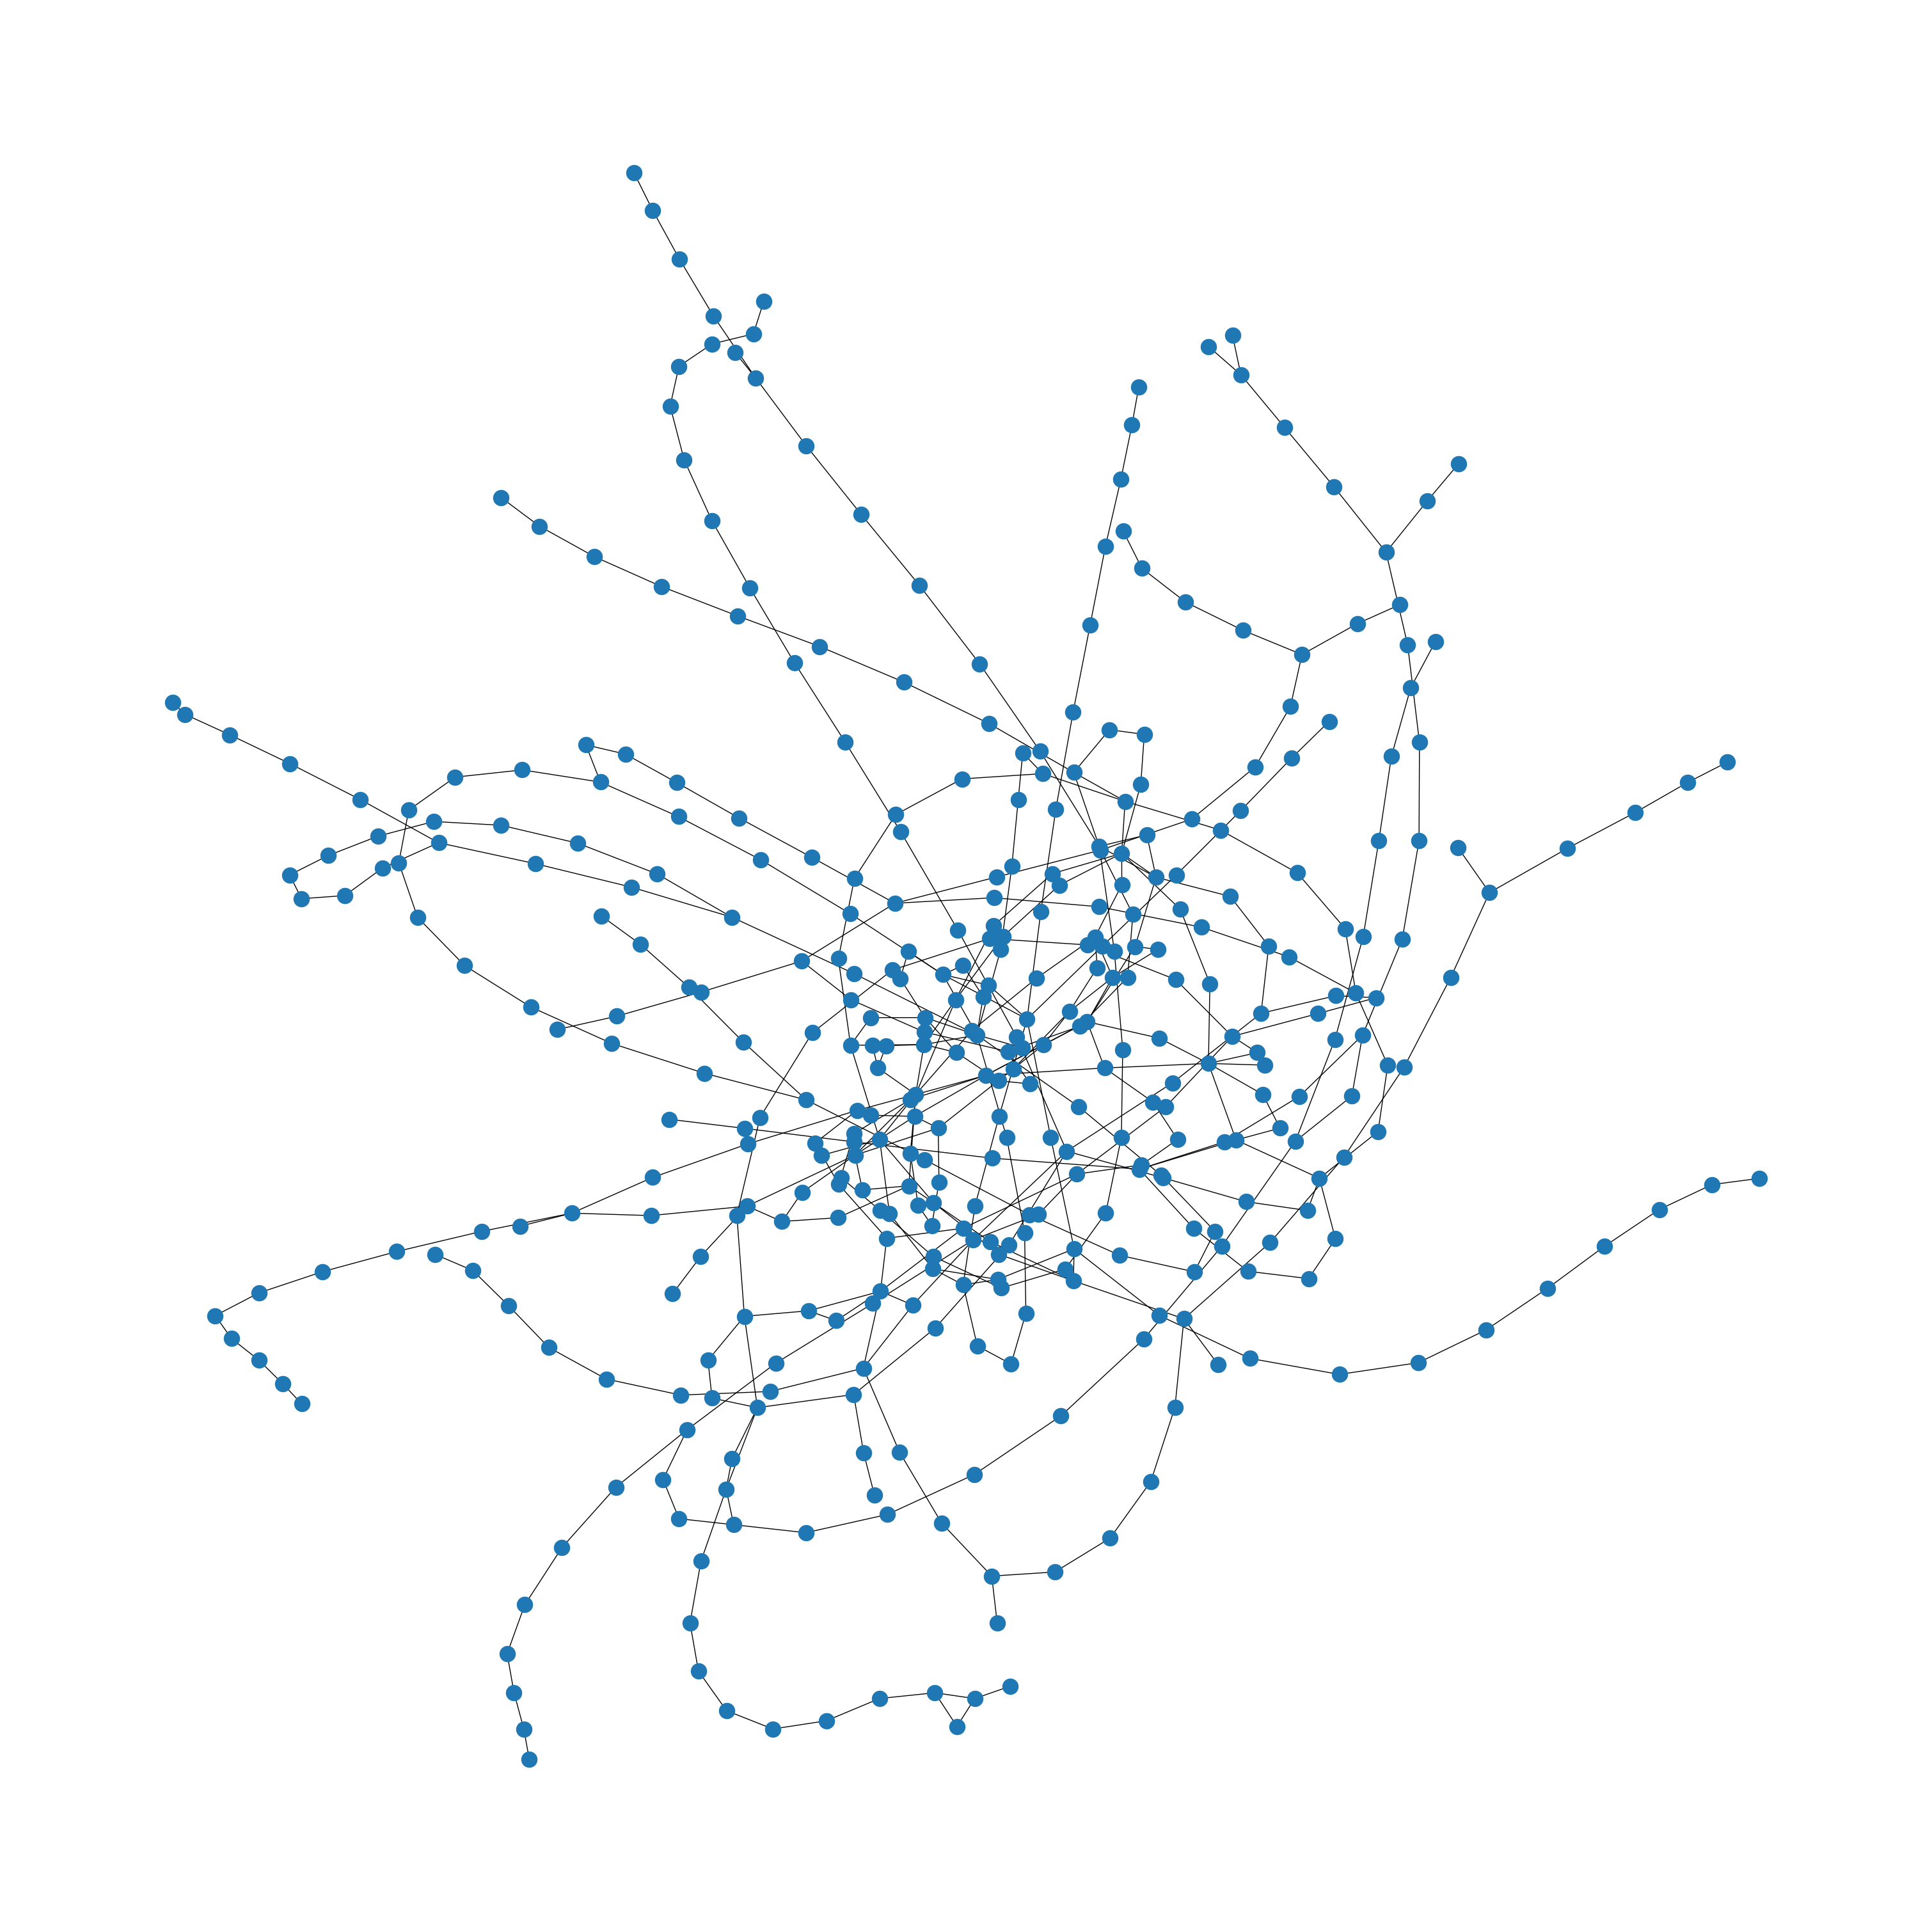

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import community
plt.figure(figsize = (30,30))
G = nx.read_graphml("london.graph.xml")
pos = nx.spring_layout(G)
node_labels = nx.get_node_attributes(G, 'desc')  
# nx.draw_networkx_labels(G, pos, labels=node_labels)
nx.draw(G, pos,with_labels = False,font_size=12)
plt.show()

In [3]:
len(G.nodes())

401

In [4]:
len(G.edges())

467

In [5]:
nx.to_pandas_edgelist(G)

source         target       length     line_name  flows
0        Wembley Park      Kingsbury  2916.771558       Jubilee  12356
1        Wembley Park        Neasden  2353.165938       Jubilee   6744
2        Wembley Park   Preston Road  1419.735166  Metropolitan  36601
3        Wembley Park  Finchley Road  7266.373927  Metropolitan  55216
4           Kingsbury     Queensbury  1245.995234       Jubilee   9419
..                ...            ...          ...           ...    ...
462  Hounslow Central  Hounslow East   745.684383    Piccadilly  13469
463     Hounslow East       Osterley   967.494672    Piccadilly  15935
464          Osterley   Boston Manor  2560.814291    Piccadilly  17445
465      Boston Manor    Northfields   930.852145    Piccadilly  18598
466          Vauxhall        Pimlico   825.328253      Victoria  61585

[467 rows x 5 columns]

# Part 1

## 1.1

####  Degree centrality
The degree of a node refers to the number of links connected to it. Let us plot the network again including this new piece of information:

In [6]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))

df_sorted = df.sort_values(["degree"], ascending=False)
df_sorted[0:10]

degree
Stratford                 0.0225
Bank and Monument         0.0200
King's Cross St. Pancras  0.0175
Baker Street              0.0175
Earl's Court              0.0150
Oxford Circus             0.0150
Liverpool Street          0.0150
Waterloo                  0.0150
Green Park                0.0150
Canning Town              0.0150

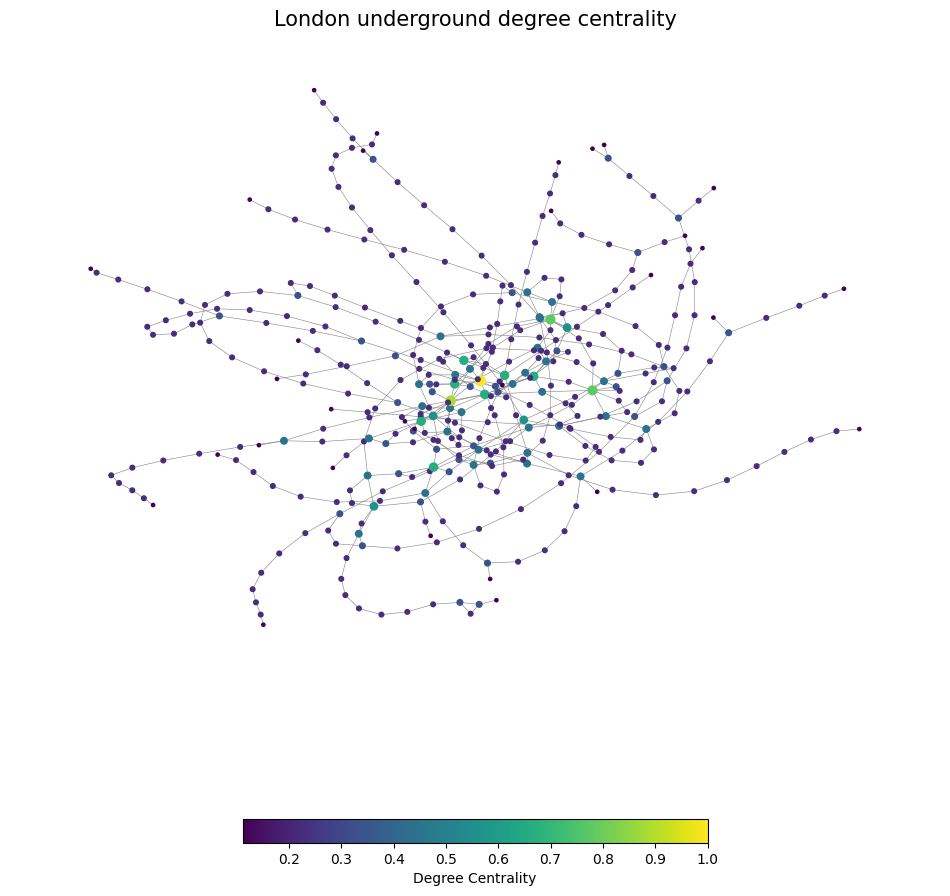

In [7]:
# Lets set colour and size of nodes according to betweenness values
degree_values=[(i[1]['degree']) for i in G.nodes(data=True)]

deg_color=[(i[1]['degree']/(max(degree_values))) for i in G.nodes(data=True)]
deg_size=[(i[1]['degree']/(max(degree_values)))*50 for i in G.nodes(data=True)]



# Plot graph

pos=pos

fig, ax = plt.subplots(figsize=(12,12))


nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)
nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= deg_color,
        node_size= deg_size)

plt.colorbar(nod,label="Degree Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London underground degree centrality",fontsize=15)
plt.show()

#### Betweenness Centrality on nodes:

In [8]:
### Topological betweenness centrality:

#Let us compute the betweenness centrality for the network, without using weights:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))

df_sorted = df.sort_values(["betweenness_t"], ascending=False)
df_sorted[0:10]

betweenness_t
Stratford                  23768.093434
Bank and Monument          23181.058947
Liverpool Street           21610.387049
King's Cross St. Pancras   20373.521465
Waterloo                   19464.882323
Green Park                 17223.622114
Euston                     16624.275469
Westminster                16226.155916
Baker Street               15287.107612
Finchley Road              13173.758009

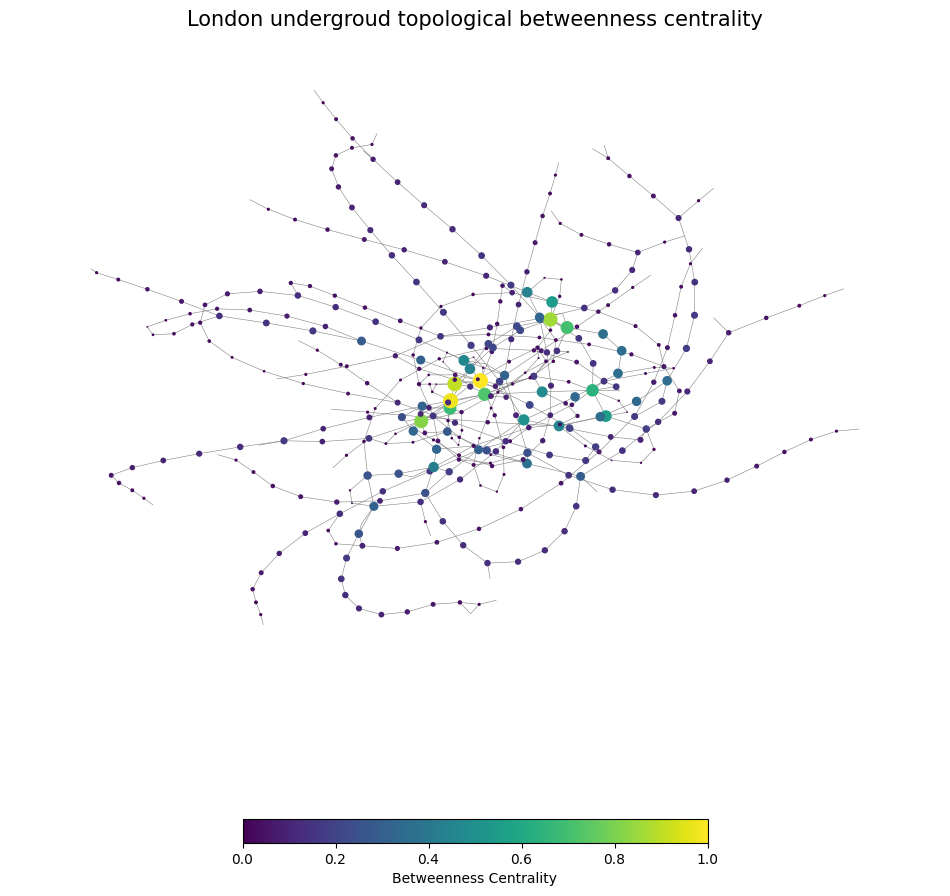

In [9]:
# Lets set colour and size of nodes according to betweenness values
betweenness_t_values=[(i[1]['betweenness_t']) for i in G.nodes(data=True)]

bet_t_color=[(i[1]['betweenness_t']/max(betweenness_t_values)) for i in G.nodes(data=True)]
bet_t_size=[(i[1]['betweenness_t']/max(betweenness_t_values))*100 for i in G.nodes(data=True)]

# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)

nod=nx.draw_networkx_nodes(G, pos = pos, node_color= bet_t_color, node_size= bet_t_size)

plt.colorbar(nod,label="Betweenness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London undergroud topological betweenness centrality",fontsize=15)
plt.show()

#### Closeness centrality

In [10]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)
df_sorted[0:10]

closeness_t
Green Park                   0.114778
Bank and Monument            0.113572
King's Cross St. Pancras     0.113443
Westminster                  0.112549
Waterloo                     0.112265
Oxford Circus                0.111204
Bond Street                  0.110988
Farringdon                   0.110742
Angel                        0.110742
Moorgate                     0.110314

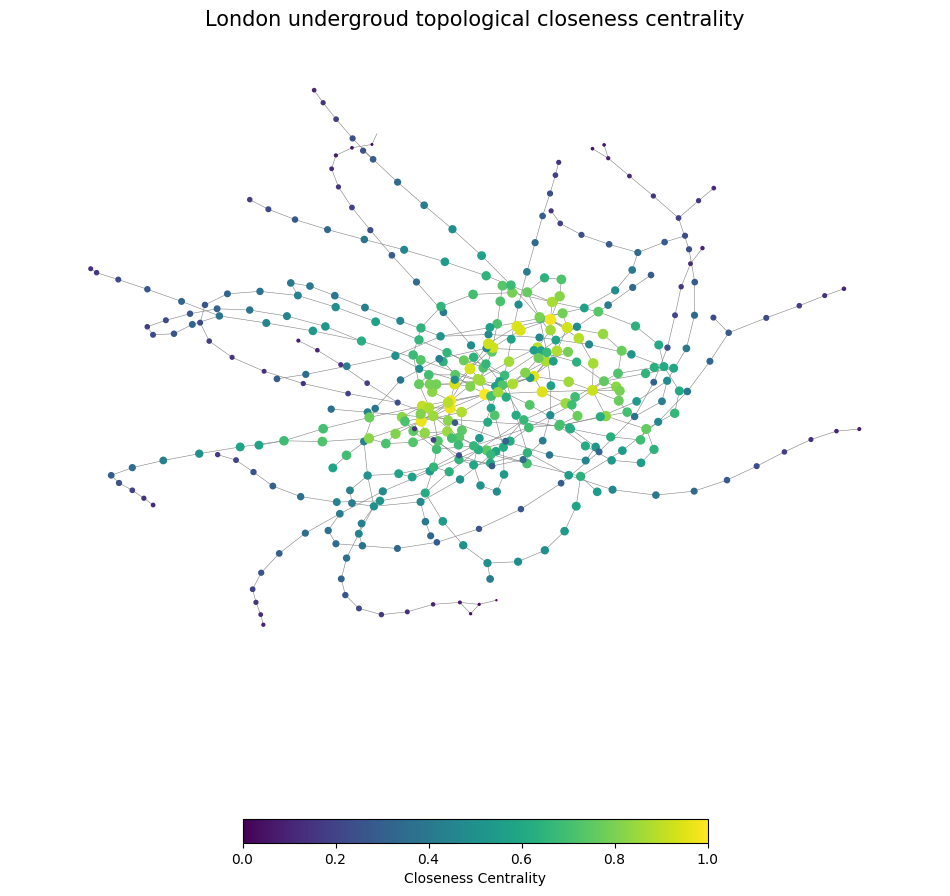

In [11]:
# Lets set color and width of nodes according to the closeness values
clos_t_val=[(i[1]['closeness_t']) for i in G.nodes(data=True)]

closs_t_color=[(i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val)) for i in G.nodes(data=True)]
closs_t_size=[((i[1]['closeness_t']-min(clos_t_val))/(max(clos_t_val)-min(clos_t_val))*50) for i in G.nodes(data=True)]


# Plot graph
fig, ax = plt.subplots(figsize=(12,12))

nx.draw_networkx_edges(G, pos,edge_color='gray', 
        width=0.4)

nod=nx.draw_networkx_nodes(G,
        pos = pos,
        node_color= closs_t_color,
        node_size= closs_t_size)

plt.colorbar(nod,label="Closeness Centrality",orientation="horizontal", shrink=0.5)
plt.axis("off")
plt.title("London undergroud topological closeness centrality",fontsize=15)
plt.show()

### 1.2

In [12]:
# let's measure the clustering coefficient
c = nx.clustering(G)
# print(type(c))

# we can sort the dictionary by the clustering coefficient
c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
# print(c[:5])

#what is the average clustering coefficient
c_avg = sum([i[1] for i in c]) / len(c)
print(f'avg clustering coefficient: {c_avg}')

avg clustering coefficient: 0.030382377389858668


In [13]:
from networkx.algorithms.community import greedy_modularity_communities
import itertools

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(G)

print(f'number of communities: {len(communities_fg)}')
# from cdlib import algorithms

# # let's try a different algorithm using cdlib
# partitions = algorithms.louvain(Gsub)
# communities_louvain = partitions.communities
# print(f'number of communities: {len(communities_louvain)}')

number of communities: 19


In [14]:
from networkx.algorithms.community.quality import modularity

print(f'modularity of fast-greedy: {modularity(G, communities_fg)}')
# print(f'modularity of louvain: {modularity(G, communities_louvain)}')

modularity of fast-greedy: 0.8302138117924331


### 1.3

#### Degree centrality

######  A) non-sequential removal

458
450
443
436
430
424
420
415
410
404
[349, 20, 2, 5, 8, 1, 5, 1]


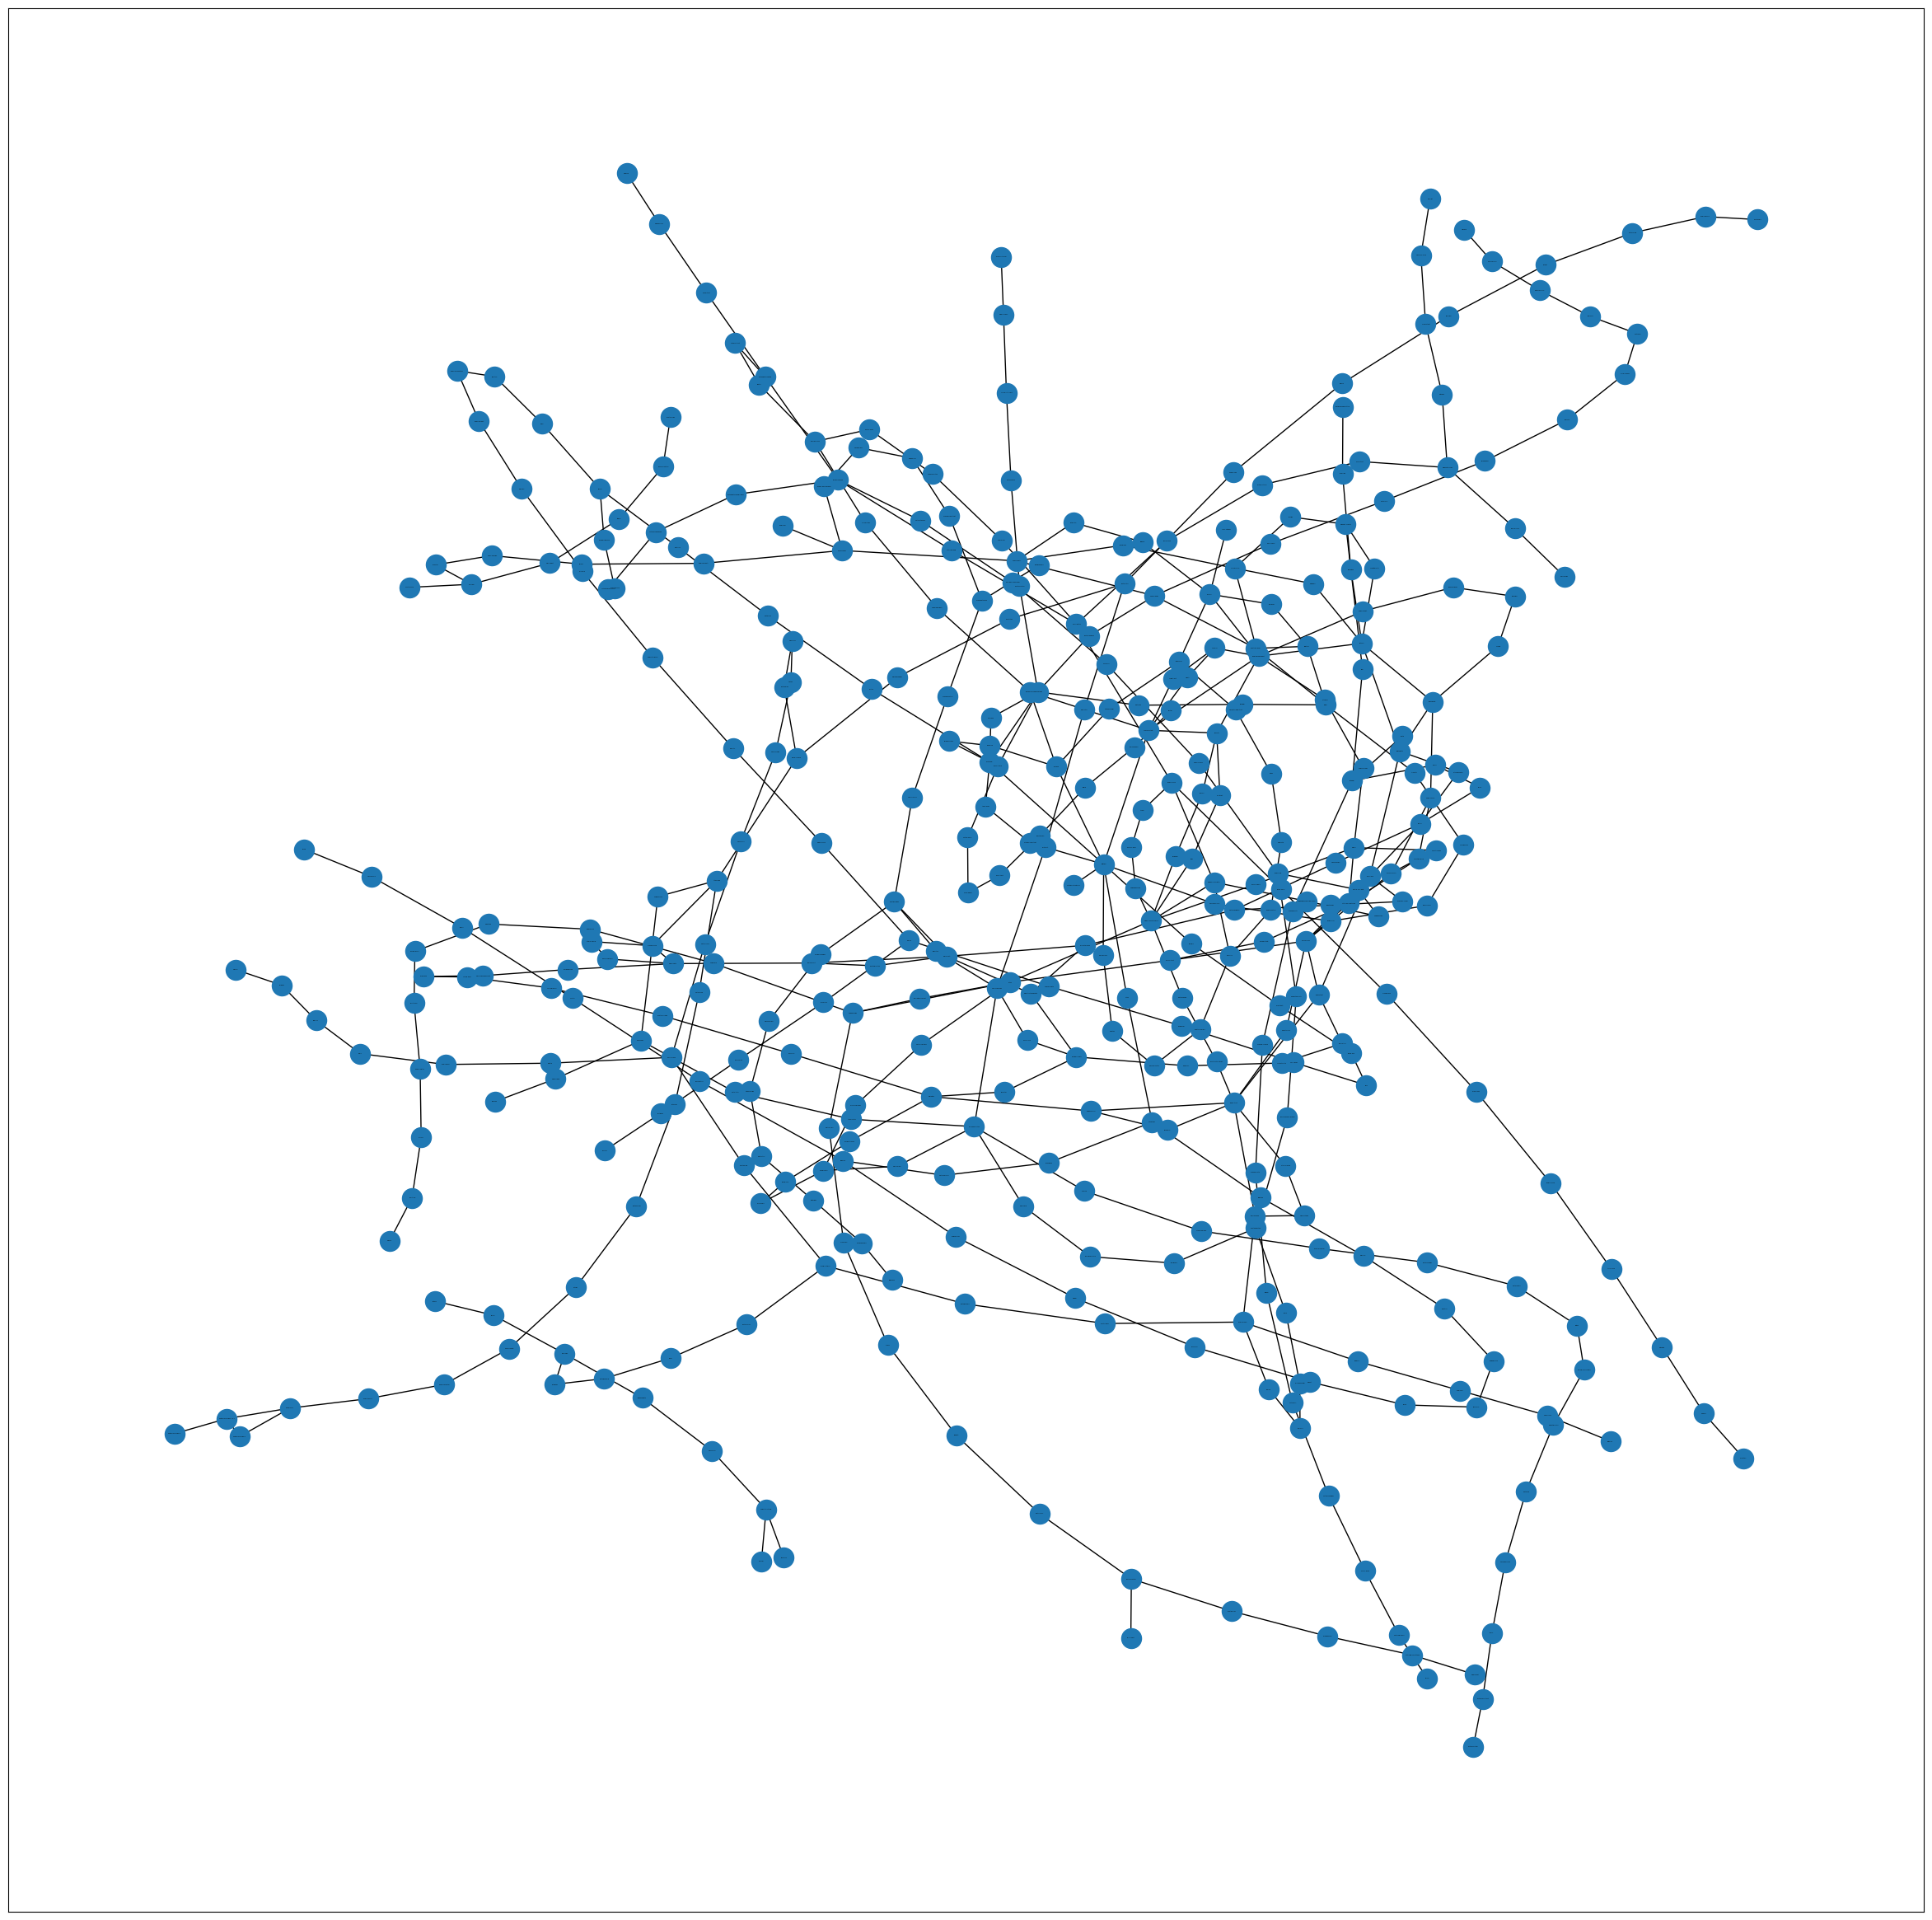

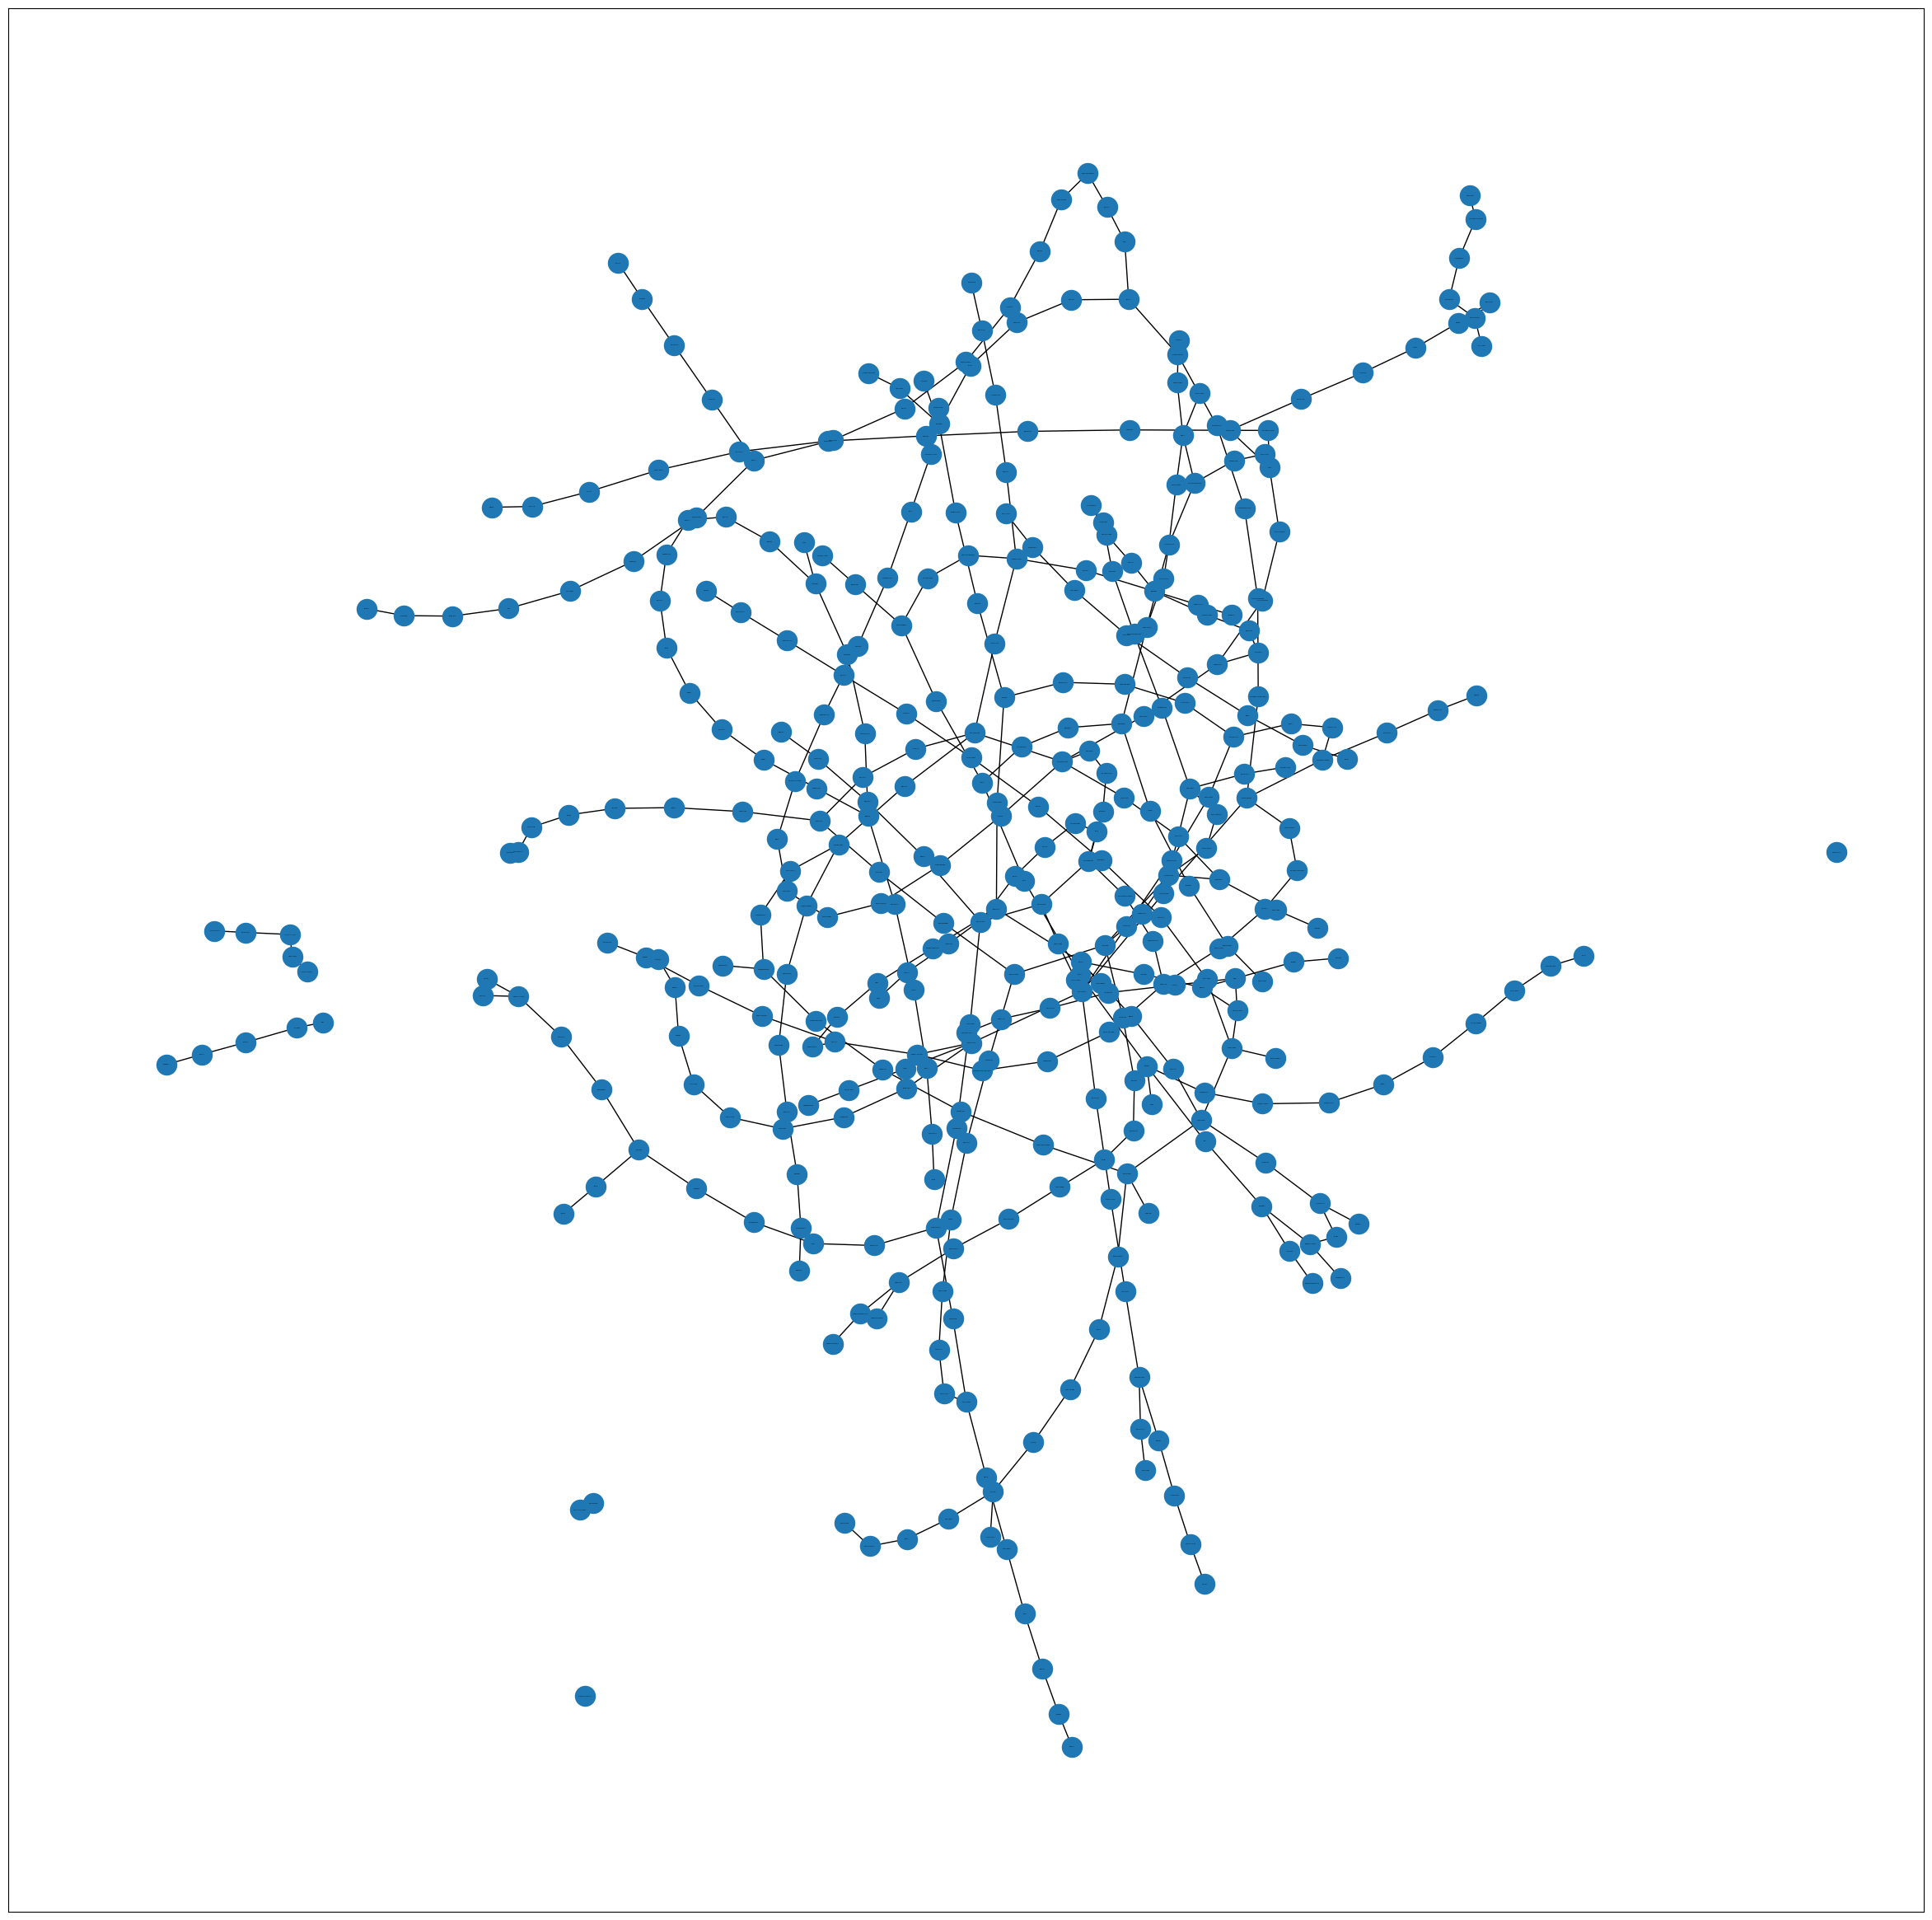

In [15]:
#  We can calculate the degree centrality using networkx function:
deg_london =nx.degree_centrality(G)
nx.set_node_attributes(G,dict(deg_london),'degree')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['degree'] = pd.Series(nx.get_node_attributes(G, 'degree'))
df_sorted = df.sort_values(["degree"], ascending=False)

G2A = nx.read_graphml("london.graph.xml")
clu_coes_A = []
modularities_A = []
diameter_A = []
num_component_A = []
#To remove nodes: 
#If we want to remove the node with the max value of degree centrality:
plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos,with_labels=True,font_size=1)
for i in range(10):
    max10bet = df_sorted.index[i]
    G2A.remove_nodes_from([max10bet])
    print(len(G2A.edges()))

plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos, with_labels=True,font_size=1)
i=0
subgraphLen=[]
for c in nx.connected_components(G2A):
    nodeSet = G.subgraph(c).nodes()
    subgraph = G.subgraph(c)
    i=i+1
    subgraphLen.append(len(subgraph))
print(subgraphLen)
#     # let's measure the clustering coefficient
#     c = nx.clustering(G2A)
#     # we can sort the dictionary by the clustering coefficient
#     c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
#     #what is the average clustering coefficient
#     c_avg = sum([i[1] for i in c]) / len(c)
#     clu_coes_A.append(c_avg)
#     communities_fg = greedy_modularity_communities(G2A)
#     modularities_A.append(modularity(G2A, communities_fg))
# #     diameter_A.append(nx.diameter(G2A))
#     num_component_A.append(nx.number_connected_components(G2A))
#     print(f'avg clustering coefficient: {c_avg}')
# #     print(f'number of communities: {len(communities_fg)}')
#     print(f'modularity of fast-greedy: {modularity(G2A, communities_fg)}')

######  B) sequential:

458
450
446
439
434
428
424
422
415
412
[339, 2, 20, 2, 5, 1, 22]


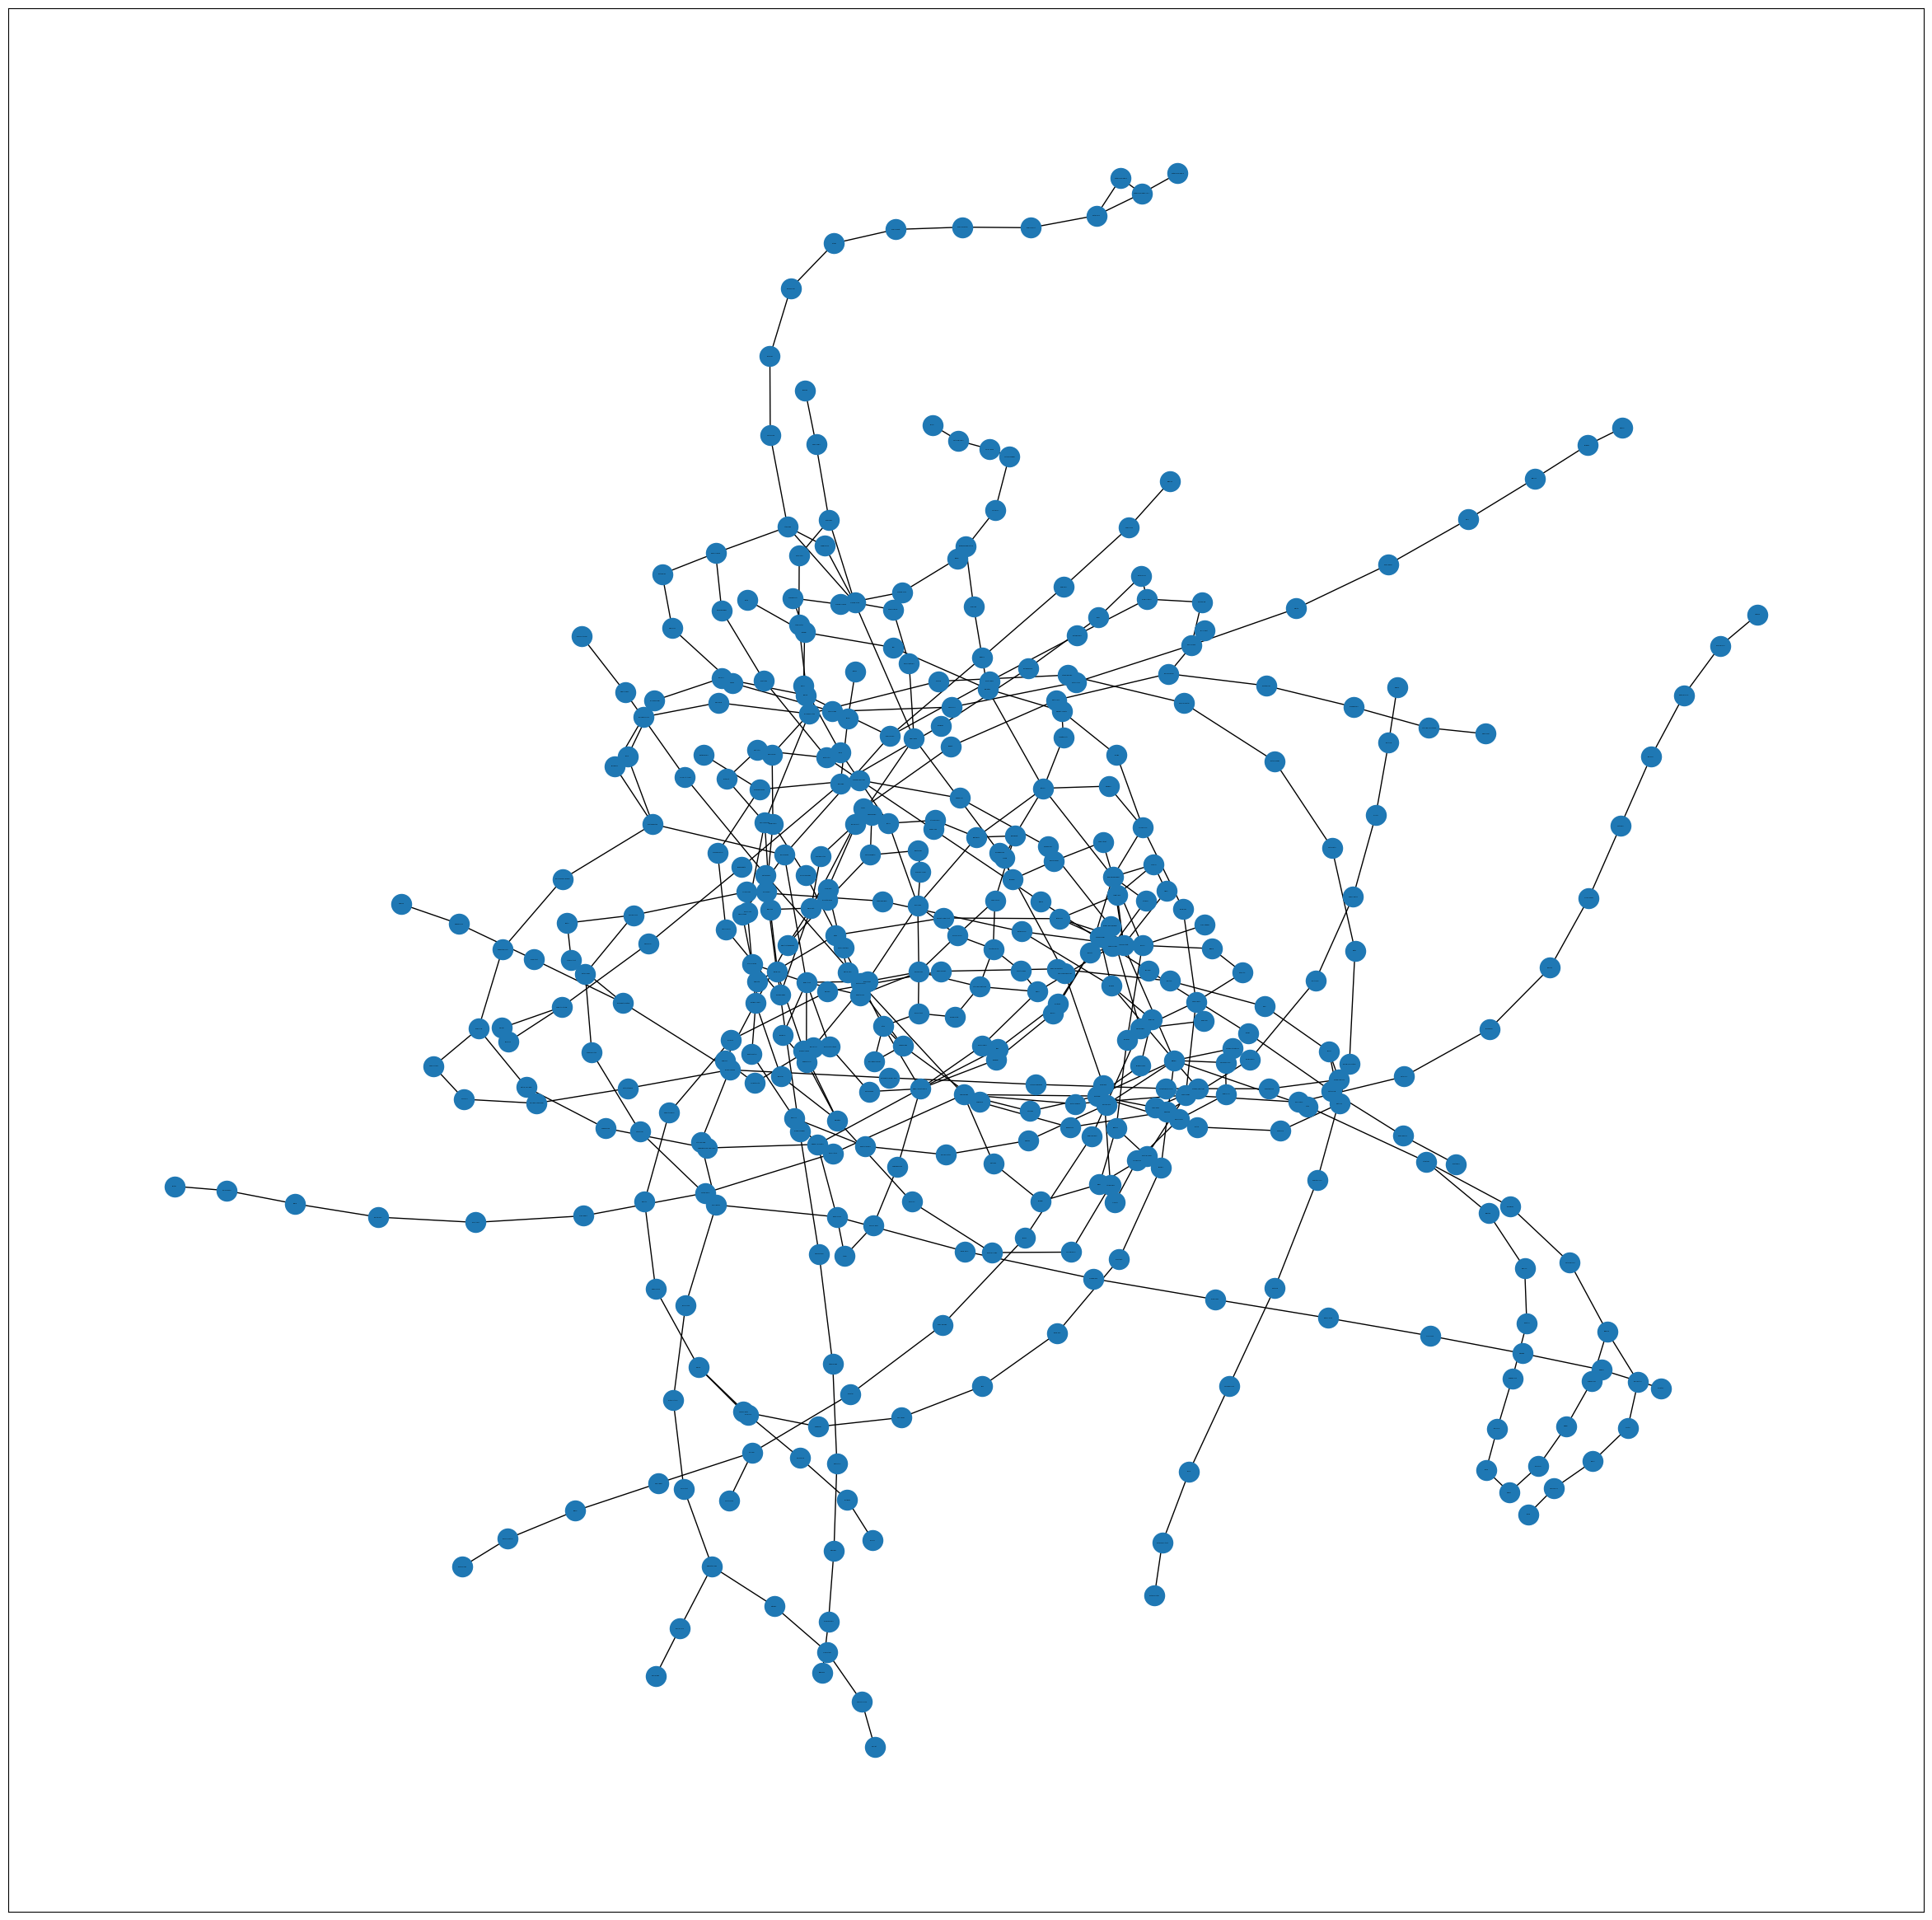

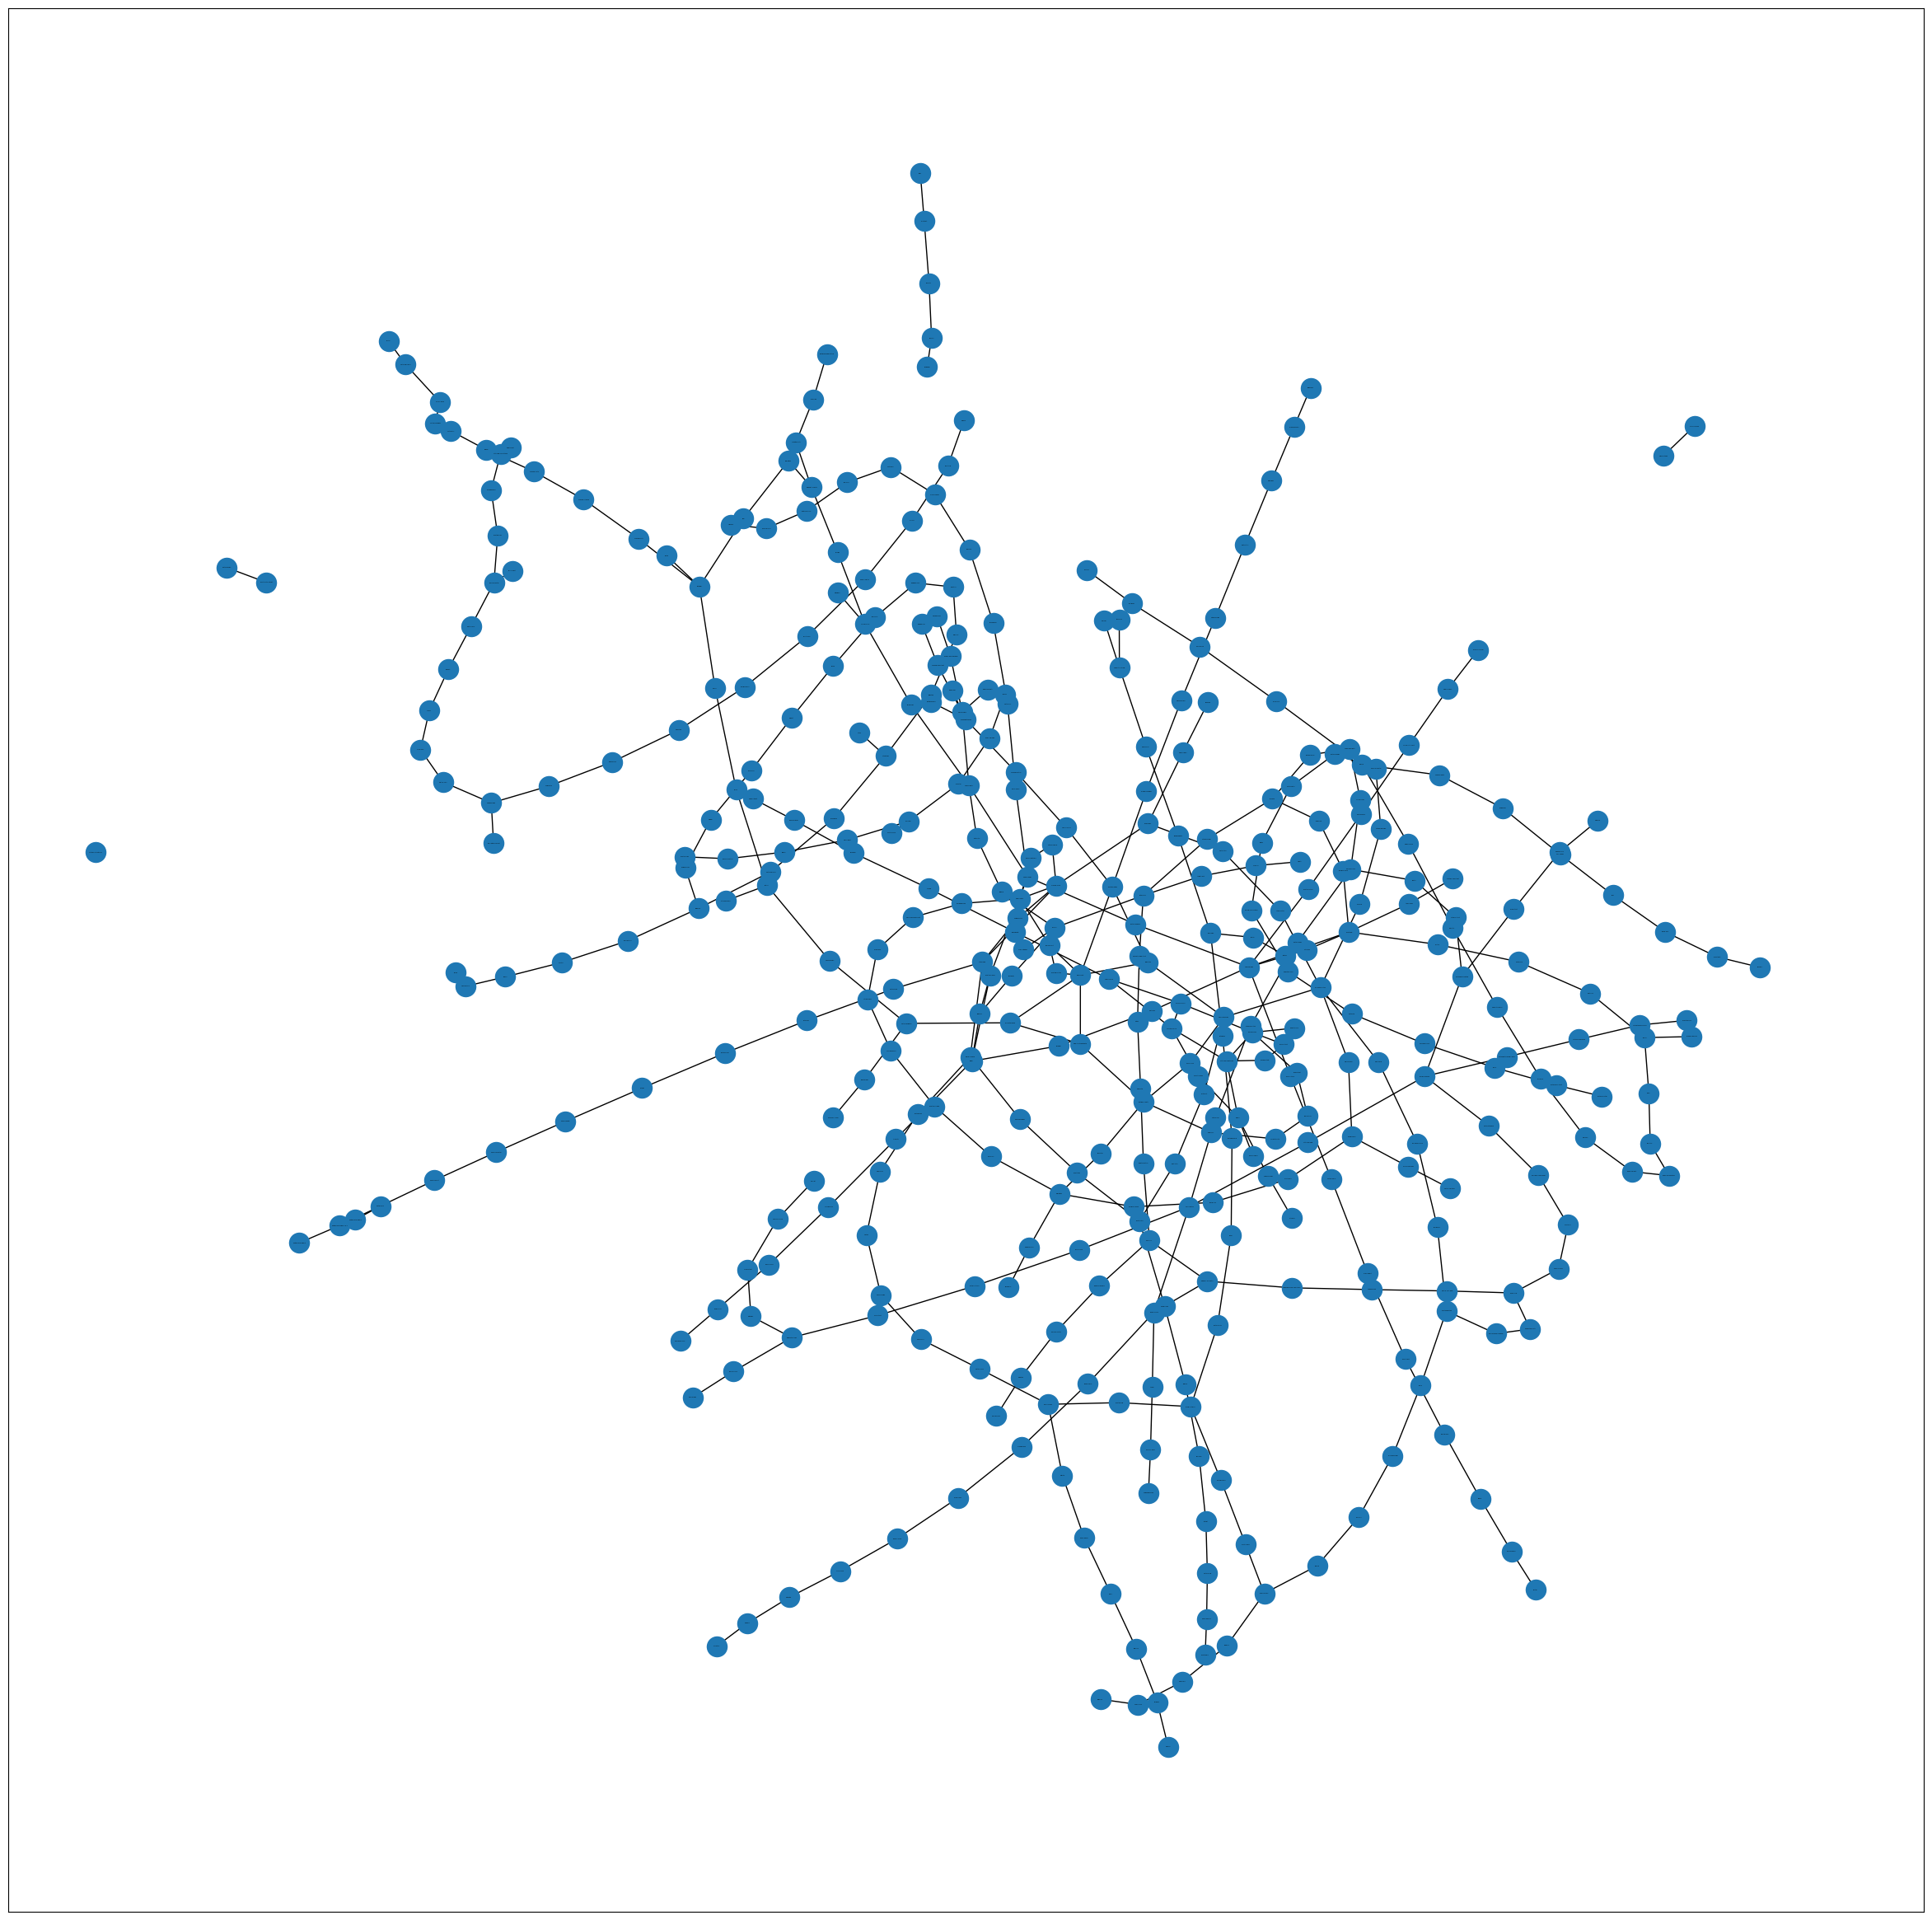

In [16]:
betweenness_london=nx.betweenness_centrality(G)
nx.set_node_attributes(G,dict(betweenness_london),'betweenness_t')
df=pd.DataFrame(index=G.nodes)
df['betweenness_t']=pd.Series(nx.get_node_attributes(G, 'betweenness_t'))
df_sorted = df.sort_values(["betweenness_t"], ascending=False)
G2A = nx.read_graphml("london.graph.xml")
clu_coes_A = []
modularities_A = []
diameter_A = []
num_component_A = []
plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos,with_labels=True,font_size=1)
for i in range(10):
    max10bet = df_sorted.index[i]
    G2A.remove_nodes_from([max10bet])
    print(len(G2A.edges()))
plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos, with_labels=True,font_size=1)
i=0
subgraphLen=[]
for c in nx.connected_components(G2A):
    nodeSet = G.subgraph(c).nodes()
    subgraph = G.subgraph(c)
    i=i+1
    subgraphLen.append(len(subgraph))
print(subgraphLen)

#### Betweenness Centrality on nodes:

461
453
446
443
439
434
432
431
430
427
[389, 1, 1]


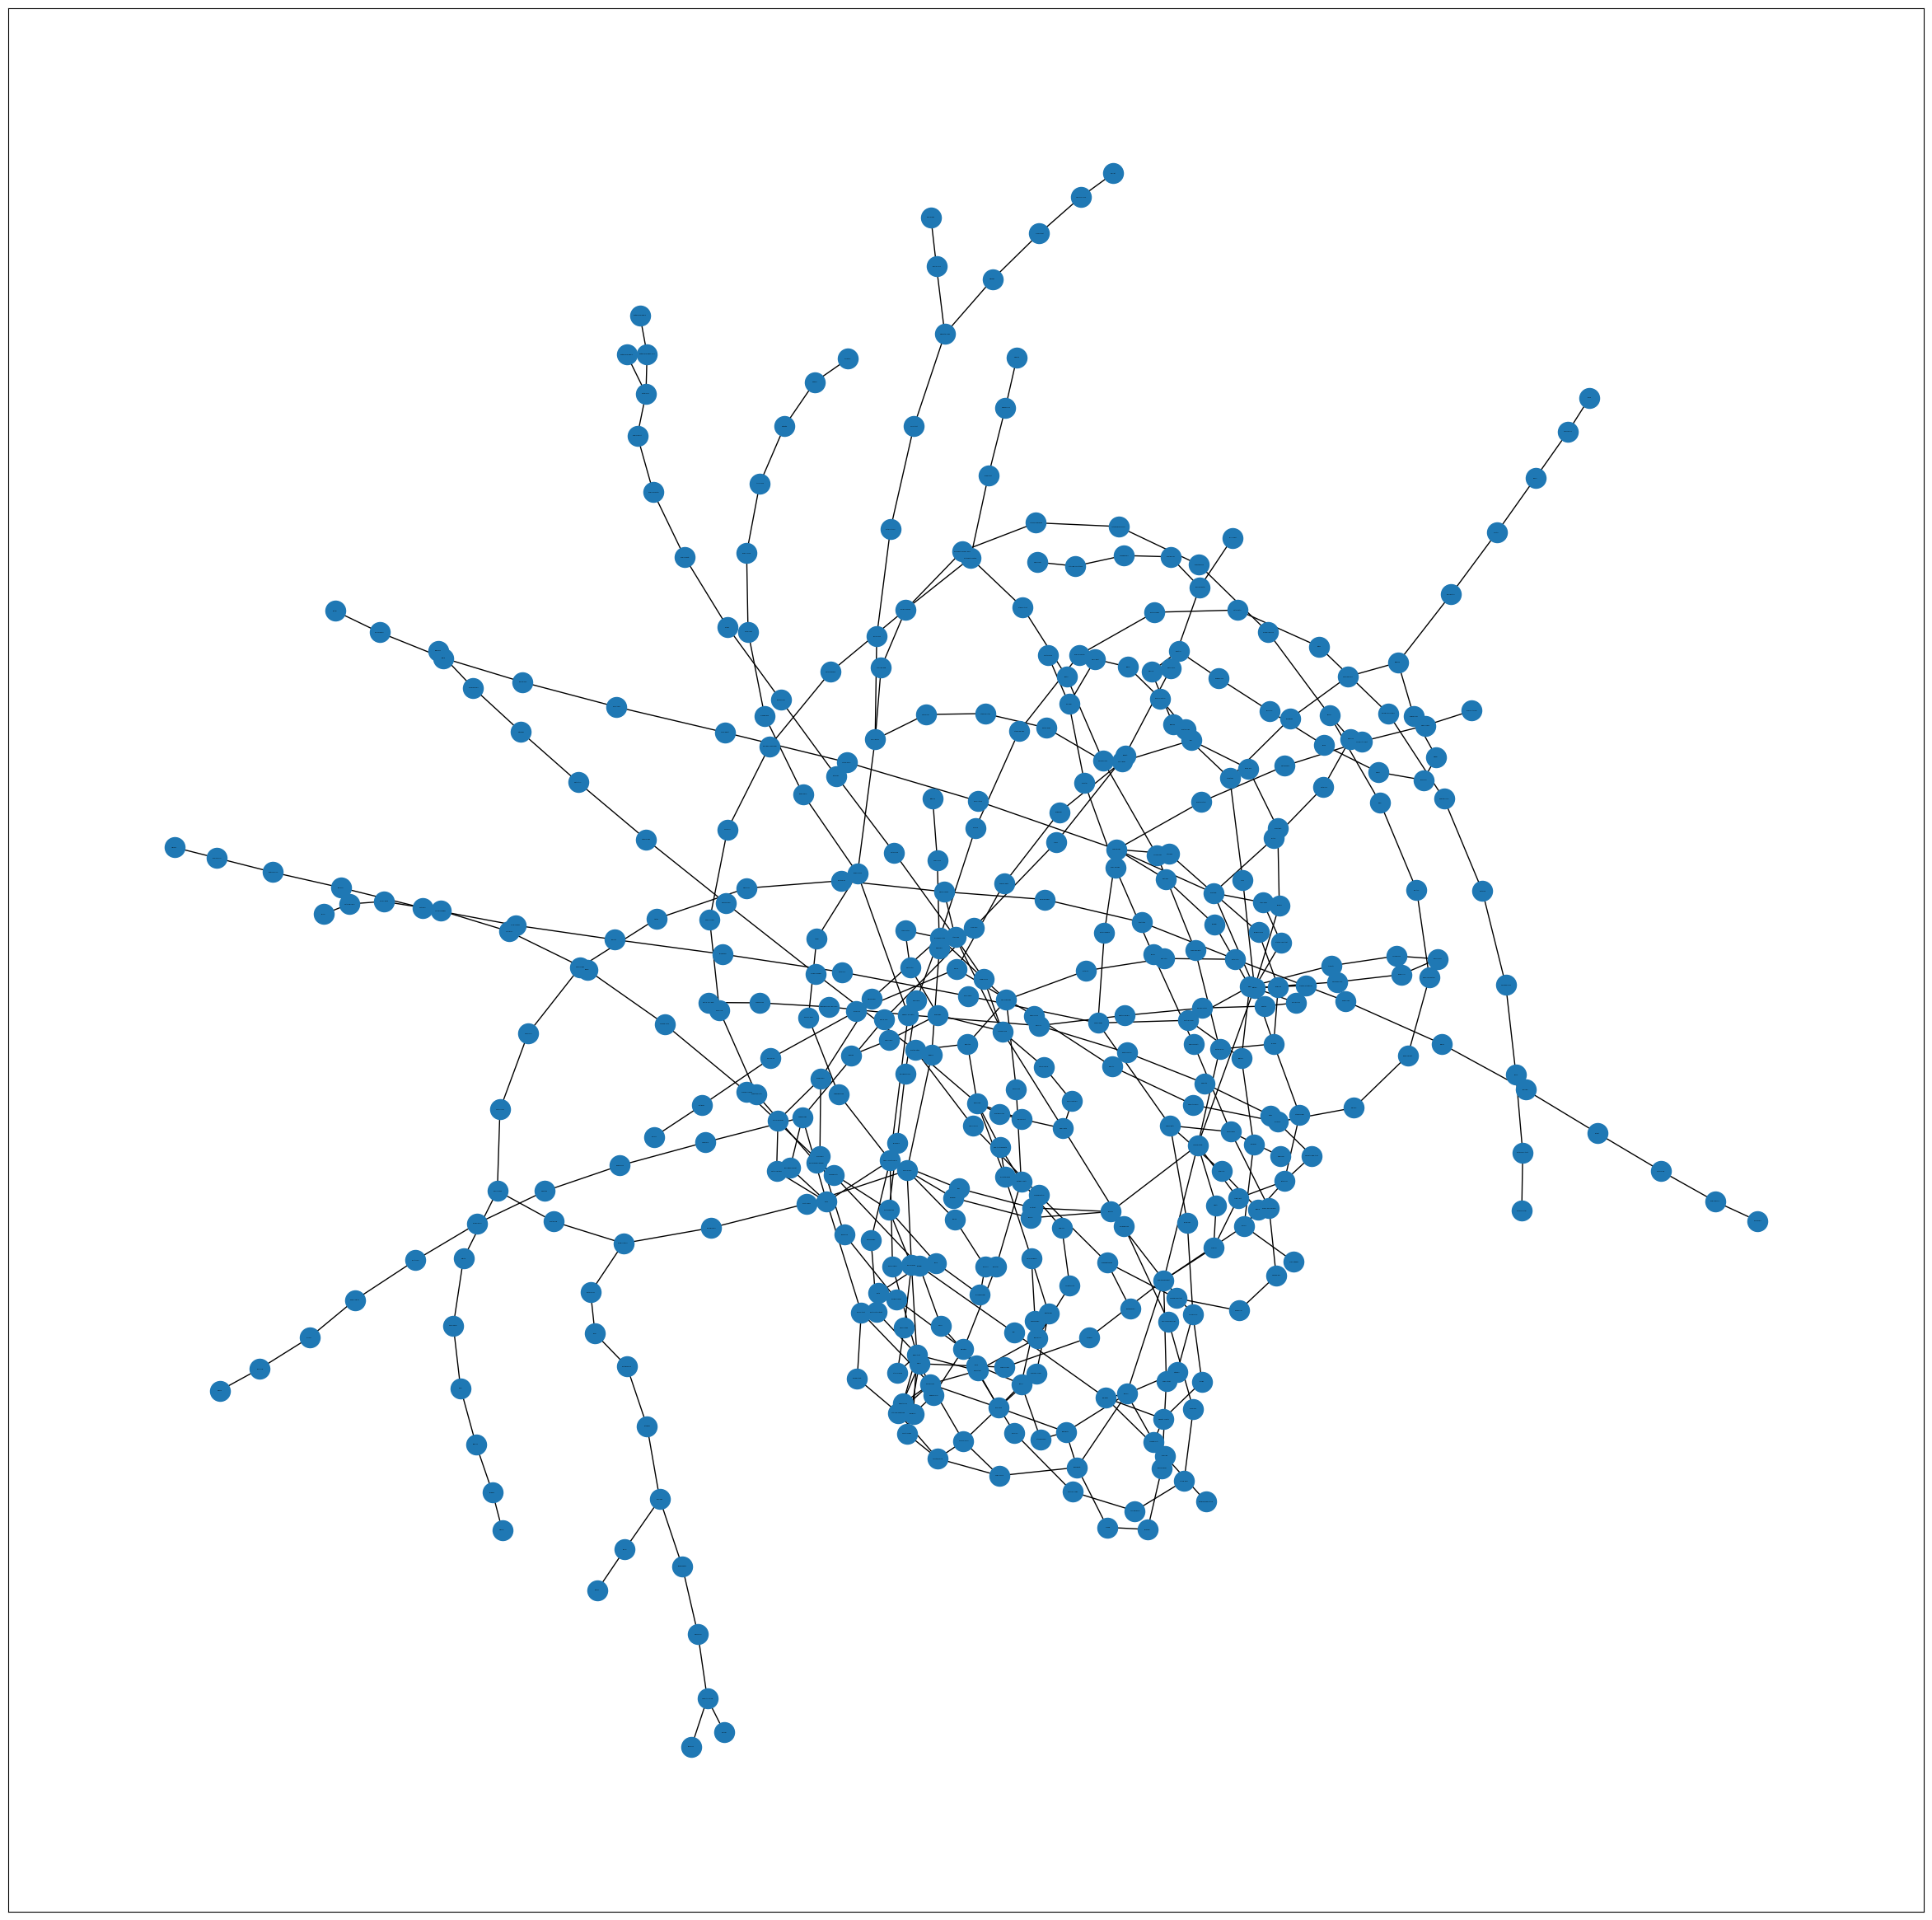

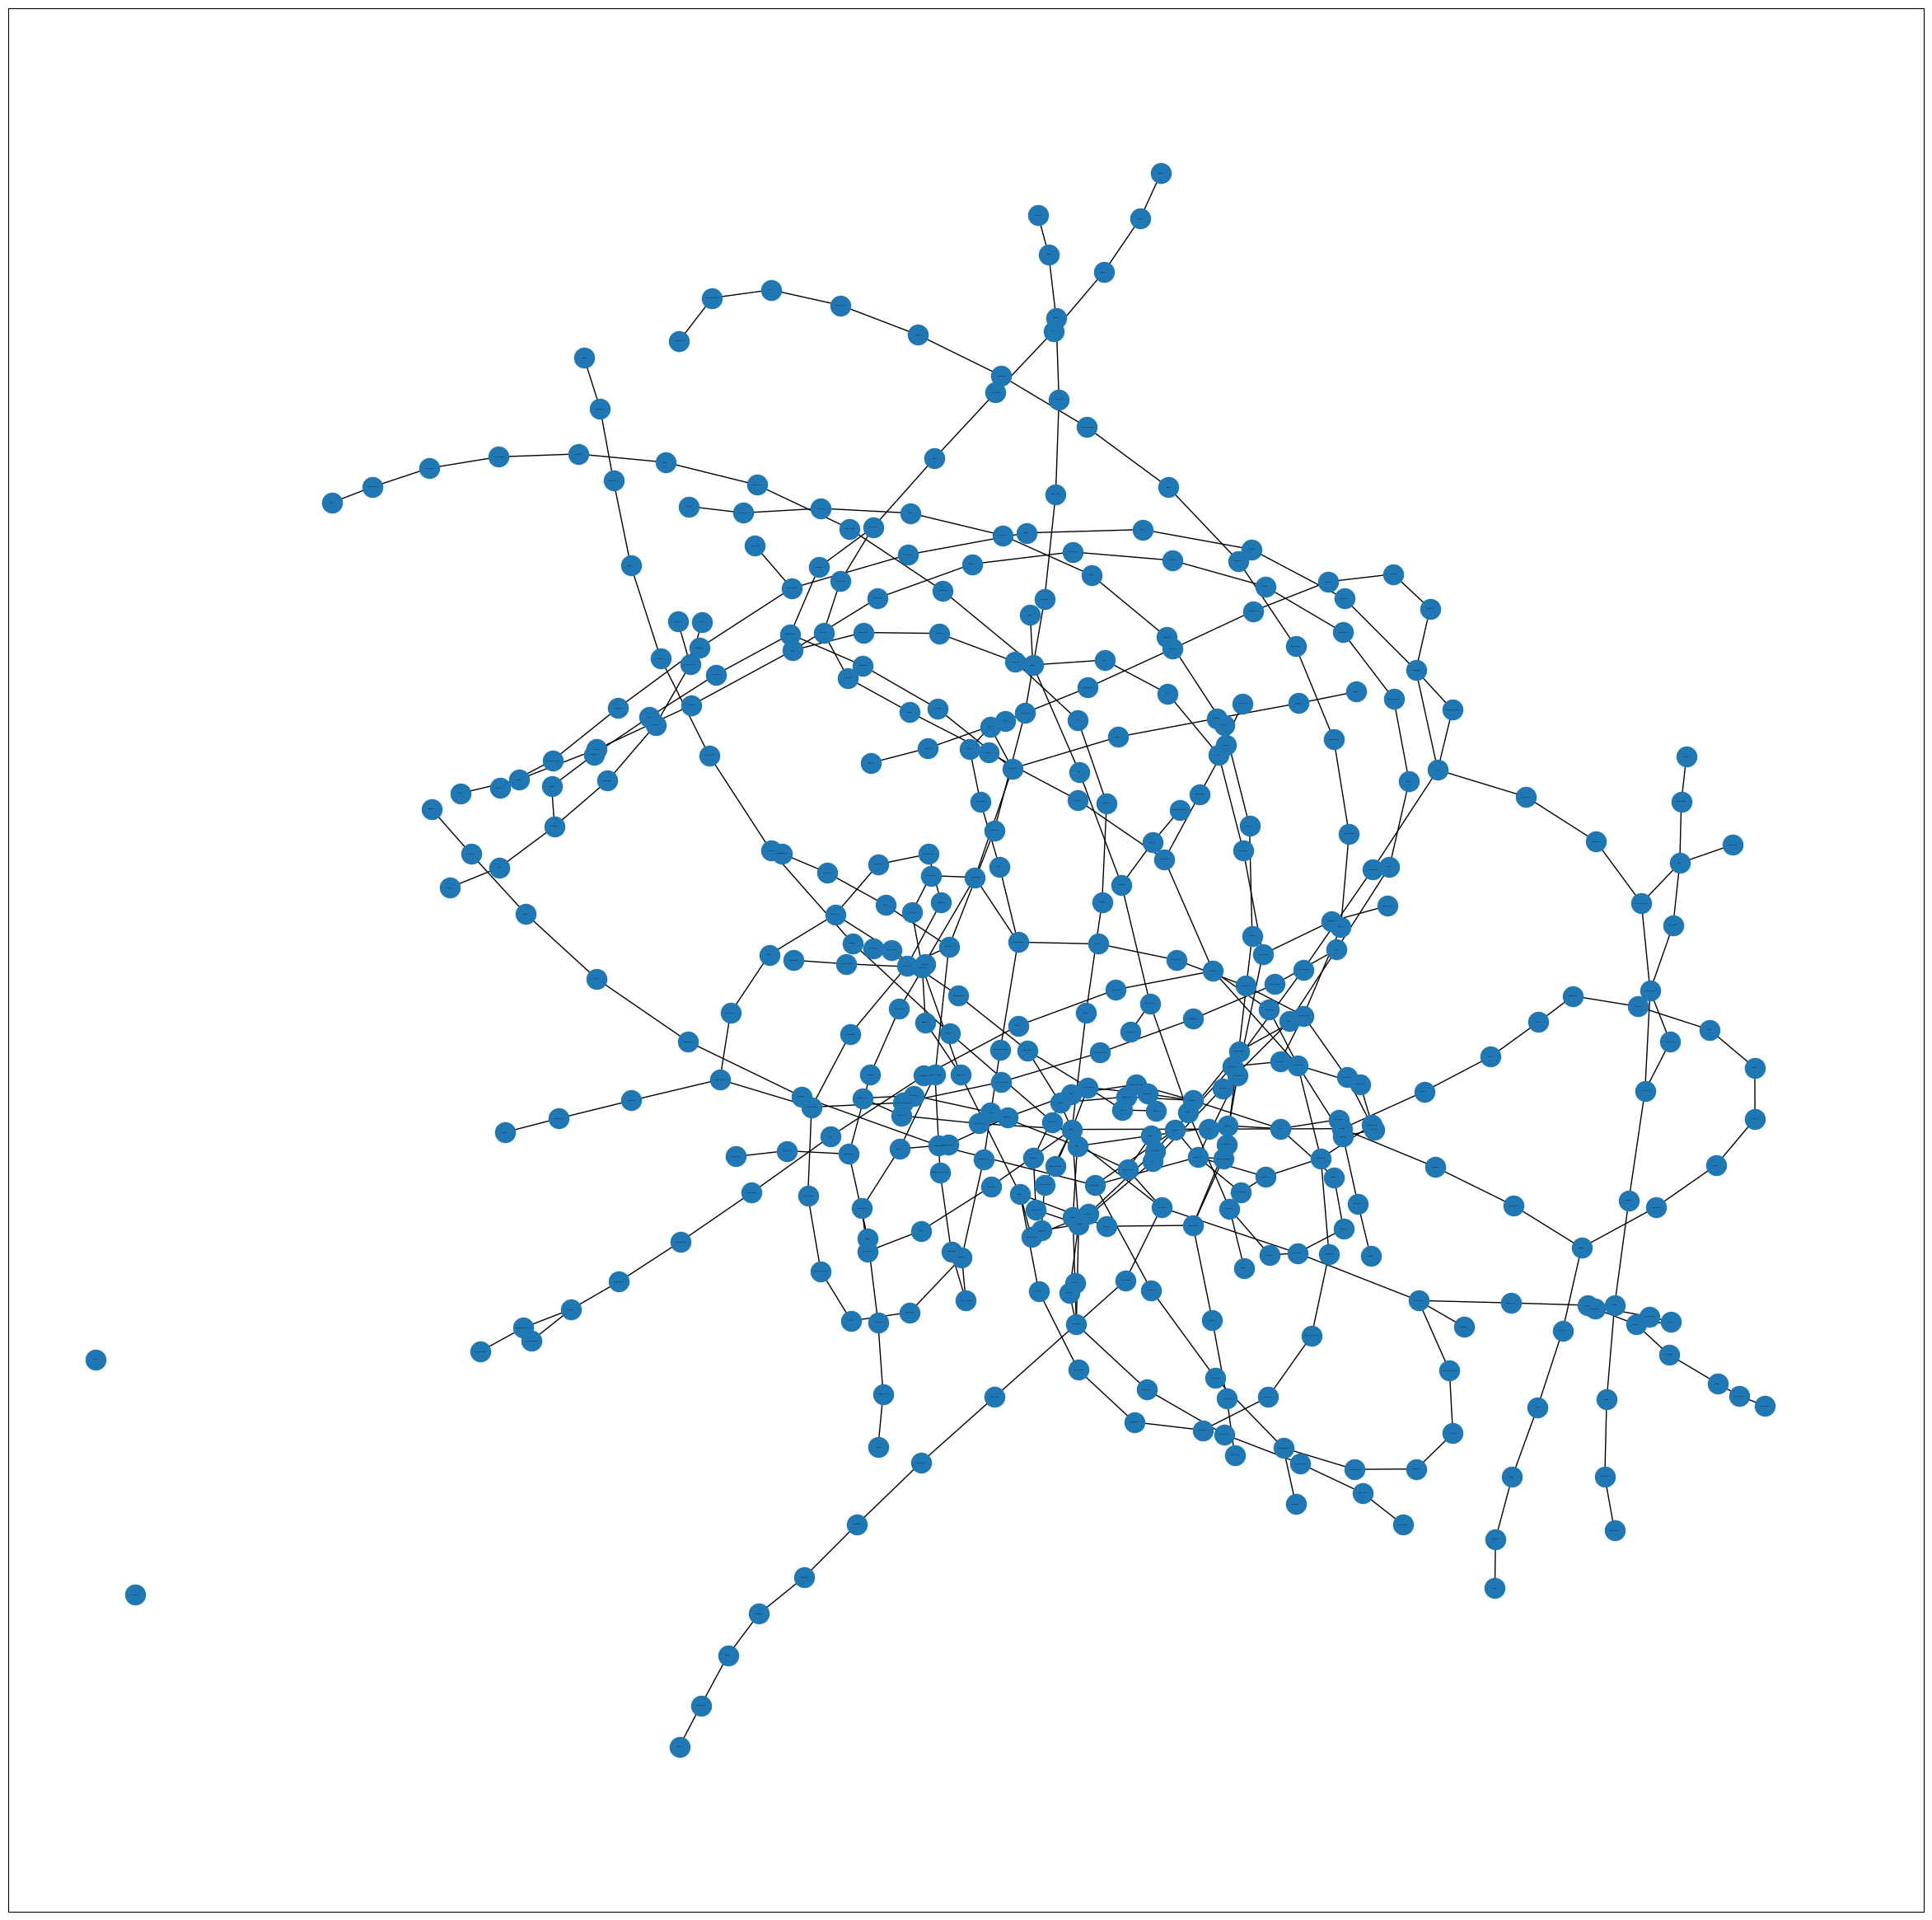

In [20]:
closeness_london=nx.closeness_centrality(G)
nx.set_node_attributes(G,dict(closeness_london),'closeness_t')
df=pd.DataFrame(index=G.nodes)
df['closeness_t']=pd.Series(nx.get_node_attributes(G, 'closeness_t'))
df_sorted = df.sort_values(["closeness_t"], ascending=False)
G2A = nx.read_graphml("london.graph.xml")
clu_coes_A = []
modularities_A = []
diameter_A = []
num_component_A = []
plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos,with_labels=True,font_size=1)
for i in range(10):
    max10bet = df_sorted.index[i]
    G2A.remove_nodes_from([max10bet])
    print(len(G2A.edges()))
plt.figure(figsize = (30,30))
pos = nx.spring_layout(G2A)
nx.draw_networkx(G2A,pos, with_labels=True,font_size=1)
i=0
subgraphLen=[]
for c in nx.connected_components(G2A):
    nodeSet = G.subgraph(c).nodes()
    subgraph = G.subgraph(c)
    i=i+1
    subgraphLen.append(len(subgraph))
print(subgraphLen)

In [18]:
G2B = nx.read_graphml("london.graph")
clu_coes_B = []
modularities_B = []
for i in range(10):
    bet_london_t=nx.betweenness_centrality(G2B, normalized=False)
    # We can add these values to the nodes attributes:
    nx.set_node_attributes(G2B,bet_london_t,'betweenness_t')
    # To ataframe using the nodes as the index
    dfB = pd.DataFrame(index=G2B.nodes())
    dfB['betweenness_t'] = pd.Series(nx.get_node_attributes(G2B, 'betweenness_t'))
    dfB_sorted = dfB.sort_values(["betweenness_t"], ascending=False)
    
    
    max10bet = dfB_sorted.index[0]
    G2B.remove_nodes_from([max10bet])
    # let's measure the clustering coefficient
    c = nx.clustering(G2B)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    c_avg = sum([i[1] for i in c]) / len(c)
    clu_coes_B.append(c_avg)
    communities_fg = greedy_modularity_communities(G2B)
    modularities_B.append(modularity(G2B, communities_fg))
    print(f'avg clustering coefficient: {c_avg}')
#     print(f'number of communities: {len(communities_fg)}')
    print(f'modularity of fast-greedy: {modularity(G2B, communities_fg)}')

FileNotFoundError: [Errno 2] No such file or directory: 'london.graph'

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), clu_coes_A, label = 'Non-sequential removal')
plt.plot(range(1,11), clu_coes_B, label = 'Sequential removal')
plt.legend()
plt.title('Betweenness Centrality')
plt.xlabel('Removal mode numbers')
plt.ylabel("Average clustering coefficient")
plt.show()
plt.figure(figsize = (10,6))
plt.plot(range(1,11), modularities_A, label = 'Non-sequential removal')
plt.plot(range(1,11), modularities_B, label = 'Sequential removal')
plt.legend()
plt.title('Betweenness Centrality')
plt.xlabel('Removal mode numbers')
plt.ylabel("Modularity")
plt.show()

#### Closeness centrality

In [ ]:
#topological closeness centrality
clos_t=nx.closeness_centrality(G)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_t,'closeness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['closeness_t'] = pd.Series(nx.get_node_attributes(G, 'closeness_t'))

df_sorted = df.sort_values(["closeness_t"], ascending=False)

G2A = nx.read_graphml("london.graph")
clu_coes_A = []
modularities_A = []
#To remove nodes: 
#If we want to remove the node with the max value of degree centrality:
for i in range(10):
    max10bet = df_sorted.index[i]
    G2A.remove_nodes_from([max10bet])
    # let's measure the clustering coefficient
    c = nx.clustering(G2A)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    c_avg = sum([i[1] for i in c]) / len(c)
    clu_coes_A.append(c_avg)
    communities_fg = greedy_modularity_communities(G2A)
    modularities_A.append(modularity(G2A, communities_fg))
    print(f'avg clustering coefficient: {c_avg}')
#     print(f'number of communities: {len(communities_fg)}')
    print(f'modularity of fast-greedy: {modularity(G2A, communities_fg)}')

In [ ]:
G2B = nx.read_graphml("london.graph")
clu_coes_B = []
modularities_B = []
for i in range(10):
    clos_t=nx.closeness_centrality(G2B)
    nx.set_node_attributes(G2B,clos_t,'closeness_t')
    dfB = pd.DataFrame(index=G2B.nodes())
    dfB['closeness_t'] = pd.Series(nx.get_node_attributes(G2B, 'closeness_t'))
    dfB_sorted = dfB.sort_values(["closeness_t"], ascending=False)
    
    max10bet = dfB_sorted.index[0]
    G2B.remove_nodes_from([max10bet])
    # let's measure the clustering coefficient
    c = nx.clustering(G2B)
    # we can sort the dictionary by the clustering coefficient
    c = sorted(c.items(), key=lambda pair: pair[1], reverse=True)
    #what is the average clustering coefficient
    c_avg = sum([i[1] for i in c]) / len(c)
    clu_coes_B.append(c_avg)
    communities_fg = greedy_modularity_communities(G2B)
    modularities_B.append(modularity(G2B, communities_fg))
    print(f'avg clustering coefficient: {c_avg}')
#     print(f'number of communities: {len(communities_fg)}')
    print(f'modularity of fast-greedy: {modularity(G2B, communities_fg)}')

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), clu_coes_A, label = 'Non-sequential removal')
plt.plot(range(1,11), clu_coes_B, label = 'Sequential removal')
plt.legend()
plt.title('Closeness Centrality')
plt.xlabel('Removal mode numbers')
plt.ylabel("Average clustering coefficient")
plt.show()
plt.figure(figsize = (10,6))
plt.plot(range(1,11), modularities_A, label = 'Non-sequential removal')
plt.plot(range(1,11), modularities_B, label = 'Sequential removal')
plt.legend()
plt.title('Closeness Centrality')
plt.xlabel('Removal mode numbers')
plt.ylabel("Modularity")
plt.show()

## II

### 2.1

In [ ]:
### Weighted betweenness centrality:
#Let us compute the betweenness centrality for the network, considering the distance between stations:
bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)
df_sorted[0:10]

In [ ]:
#Weighted closeness centrality: 
clos_w=nx.closeness_centrality(G, distance='flows')
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,clos_w,'closeness_w')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['closeness_w'] = pd.Series(nx.get_node_attributes(G, 'closeness_w'))

df_sorted = df.sort_values(["closeness_w"], ascending=False)
df_sorted[0:10]

### 2.2

In [ ]:
#let's start with greedy modularity
communities_fg = greedy_modularity_communities(G)
print(f'number of communities: {len(communities_fg)}')
print(f'modularity of fast-greedy: {modularity(G, communities_fg, weight = "flows")}')

In [ ]:
# let's try a different algorithm using cdlib
partition = community.best_partition(G)
# mod = community.modularity(partition,G)
print(f'modularity of louvain: {community.modularity(partition,G)}')

### 2.3

##### betweenness centrality

In [ ]:
bet_london_t=nx.betweenness_centrality(G, normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_t,'betweenness_t')

# To ataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
# df['station_name'] = pd.Series(nx.get_node_attributes(G, 'station_name'))
df['betweenness_t'] = pd.Series(nx.get_node_attributes(G, 'betweenness_t'))
df_sorted = df.sort_values(["betweenness_t"], ascending=False)

print(df_sorted.index[0])
G3A = nx.read_graphml("london.graph")
maxbet = df_sorted.index[0]
G3A.remove_nodes_from([maxbet])

print(f'avg clustering coefficient: {nx.average_clustering(G3A,weight = "flows")}' ) 

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(G3A)
print(f'modularity of fast-greedy: {modularity(G3A,communities_fg,weight="flows")}')
# louvain modularity
partition = community.best_partition(G3A)
print(f'modularity of louvain: {community.modularity(partition,G3A,weight="flows")}')

In [ ]:
#Weighted closeness centrality: 
bet_london_w=nx.betweenness_centrality(G,weight='flows',normalized=False)
# We can add these values to the nodes attributes:
nx.set_node_attributes(G,bet_london_w,'betweenness_w')
# To dataframe using the nodes as the index
df = pd.DataFrame(index=G.nodes())
df['betweenness_w'] = pd.Series(nx.get_node_attributes(G, 'betweenness_w'))

df_sorted = df.sort_values(["betweenness_w"], ascending=False)


print(df_sorted.index[0])
G3B = nx.read_graphml("london.graph")
maxbet = df_sorted.index[0]
G3B.remove_nodes_from([maxbet])

print(f'avg clustering coefficient: {nx.average_clustering(G3B,weight = "flows")}' )

# let's start with greedy modularity
communities_fg = greedy_modularity_communities(G3B)
print(f'modularity of fast-greedy: {modularity(G3B,communities_fg,weight="flows")}')
      
partition = community.best_partition(G3B)
# mod = community.modularity(partition,G)
print(f'modularity of louvain: {community.modularity(partition,G3B,weight="flows")}')